In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

Predict 10 Steps Ahead

In [2]:
def generateTimeSeries(m, nSeq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, m, 1)
    time = np.linspace(0, 1, nSeq)
    series = 0.5 * np.cos((time - offsets1) * (freq1 * 10 +10))
    series += 0.3 * np.sin((time-offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(m, nSeq) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(1)
nSeq = 30
nPred = 10

series = generateTimeSeries(5000, nSeq + nPred)
series.shape

(5000, 40, 1)

In [4]:
xTrain, yTrain = series[:3000, :nSeq], series[:3000, -nPred:,0]
xValid, yValid = series[3000:4000, :nSeq], series[3000:4000, -nPred:,0]
xTest, yTest = series[4000:, :nSeq], series[4000:, -nPred:, 0]

In [5]:
xTrain.shape, yTrain.shape

((3000, 30, 1), (3000, 10))

In [6]:
def plotSeq (x, y, yPred=None):
    plt.plot(x, '.-')
    nSeq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(nSeq, nSeq + ahead), y, 'go-', label='y')
    if yPred is not None:
        plt.plot(np.arange(nSeq, nSeq + ahead), yPred, 'rx-', label='$\hat y$', markersize=10)
    plt.hlines(0, 0, nSeq +ahead, linewidth=1)
    plt.axis([0, nSeq + ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

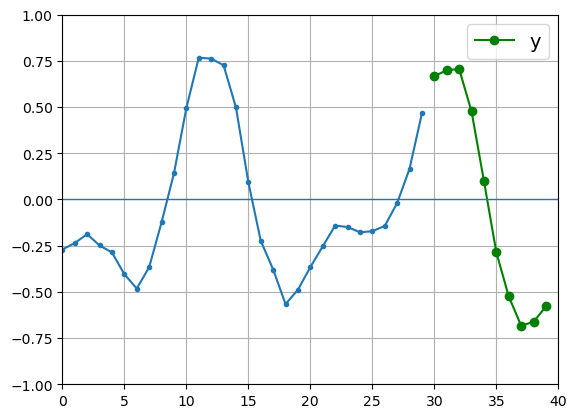

In [7]:
plotSeq(xTest[0, :, 0], yTest[0])

Sequence to Vector Networks

In [8]:
np.random.seed(1)
tf.random.set_seed(1)

In [9]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
Total params: 1470 (5.74 KB)
Trainable params: 1470 (5.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam')

In [12]:
train = model.fit(xTrain, yTrain, epochs=20, validation_data=(xValid, yValid))

Epoch 1/20
94/94 [==============================] - 1s 5ms/step - loss: 0.1527 - val_loss: 0.0905
Epoch 2/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0752 - val_loss: 0.0640
Epoch 3/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0603 - val_loss: 0.0546
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.0503
Epoch 5/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.0433
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.0395
Epoch 7/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0383
Epoch 8/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.0347
Epoch 9/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0339 - val_loss: 0.0367
Epoch 10/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.0328
Epoch 11/20
94/94 [

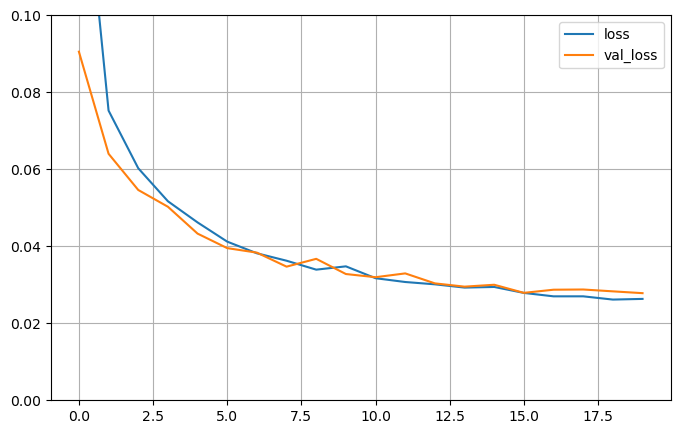

In [13]:
pd.DataFrame(train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 0.1)
plt.show()

In [14]:
model.evaluate(xTest, yTest)

32/32 [==============================] - 0s 895us/step - loss: 0.0272


0.027186837047338486

In [15]:
yPred = model.predict(xTest)

32/32 [==============================] - 0s 1ms/step


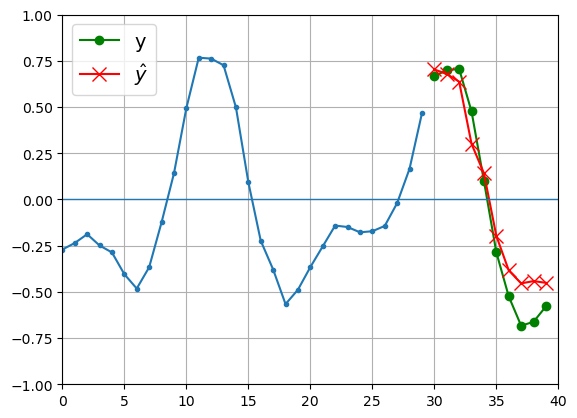

In [16]:
i = 0
plotSeq(xTest[i, :, 0], yTest[i], yPred[i])

Predict 10 steps ahead Sequence to Sequence Networks

In [17]:
np.random.seed(1)
nSeq = 30
nPred = 10
series = generateTimeSeries(5000, nSeq + nPred)
series.shape

(5000, 40, 1)

In [18]:
xTrain = series[:3000, :nSeq]
xValid = series[3000:4000, :nSeq]
xTest = series [4000:, :nSeq]

In [19]:
y = np.empty((5000, nSeq, nPred))

for step_ahead in range(1, nPred +1):
    y[..., step_ahead - 1] = series[...,step_ahead:step_ahead + nSeq, 0]

yTrain = y[:3000]
yValid = y[3000:4000]
yTest = y[4000:]

In [20]:
xTrain.shape, yTrain.shape

((3000, 30, 1), (3000, 30, 10))

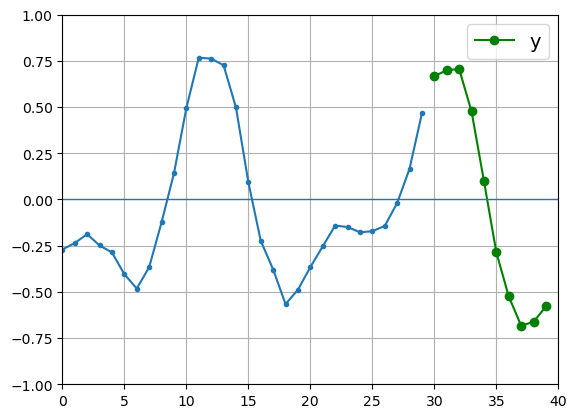

In [21]:
plotSeq(xTest[0, :, 0], yTest[0, -1])

Sequence to Sequence Networks

In [22]:
np.random.seed(1)
tf.random.set_seed(1)

In [23]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 time_distributed (TimeDist  (None, None, 10)          210       
 ributed)                                                        
                                                                 
Total params: 1470 (5.74 KB)
Trainable params: 1470 (5.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
def lastTimeStepMse(yTrue, yPred):
    return keras.metrics.mean_squared_error(yTrue[:,-1], yPred[:,-1])

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[lastTimeStepMse])

In [26]:
train = model.fit(xTrain, yTrain, epochs = 20, validation_data=(xValid, yValid))

Epoch 1/20
94/94 [==============================] - 1s 5ms/step - loss: 0.1110 - lastTimeStepMse: 0.1022 - val_loss: 0.0850 - val_lastTimeStepMse: 0.0743
Epoch 2/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0824 - lastTimeStepMse: 0.0697 - val_loss: 0.0811 - val_lastTimeStepMse: 0.0685
Epoch 3/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0762 - lastTimeStepMse: 0.0582 - val_loss: 0.0759 - val_lastTimeStepMse: 0.0602
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0714 - lastTimeStepMse: 0.0519 - val_loss: 0.0751 - val_lastTimeStepMse: 0.0700
Epoch 5/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0660 - lastTimeStepMse: 0.0450 - val_loss: 0.0603 - val_lastTimeStepMse: 0.0362
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0568 - lastTimeStepMse: 0.0309 - val_loss: 0.0515 - val_lastTimeStepMse: 0.0229
Epoch 7/20
94/94 [==============================] - 0s 3ms/step - loss: 0.05

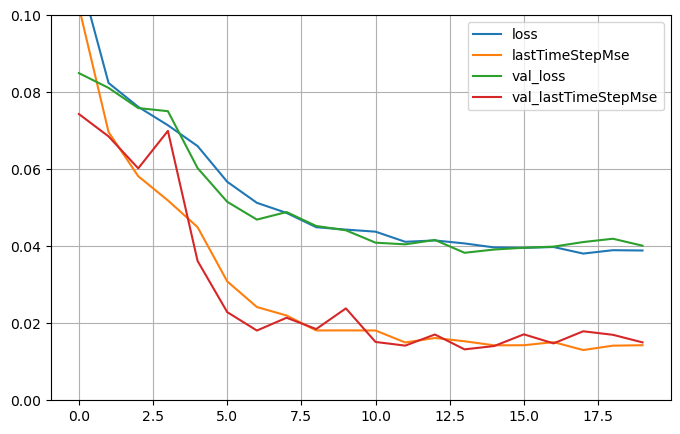

In [27]:
pd.DataFrame(train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 0.1)
plt.show()

In [28]:
model.evaluate(xTest, yTest)

32/32 [==============================] - 0s 938us/step - loss: 0.0395 - lastTimeStepMse: 0.0145


[0.03950817137956619, 0.014515639282763004]

In [29]:
yPred = model.predict(xTest)

32/32 [==============================] - 0s 1ms/step


In [30]:
yTest.shape, yPred.shape

((1000, 30, 10), (1000, 30, 10))

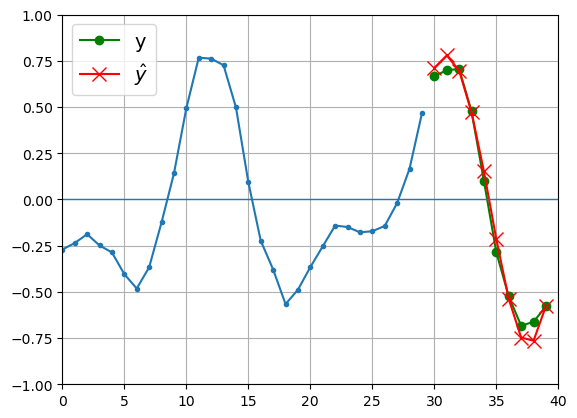

In [31]:
i = 0
plotSeq(xTest[i, :, 0], yTest[i, -1], yPred[i, -1])